In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit

In [10]:
vims_wave = np.loadtxt('vims_wave.txt')
new_array = ['_0405','_0607','_0809','_1011','_1213','_1415','_1617']
for number in new_array:
    new_string = 'df'+number+' = '+'pd.read_pickle("e_data/data'+number+'.pkl")'
    exec(new_string)

## Functions for different types of fits and curves

In [11]:
def powerlaw(x,a,b):
    return a*np.power(x,b)

def gaussian(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

band_channels = [29,30,31,32,33,34,46,47,48,49,50,51,52,53,54,55,56,57,58,59,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,102,103,104,105]

window = list(range(56,83))

def fit_line(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_fit = powerlaw(vims_wave,*my_fit)
    return final_fit

def custom_fit(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_spectra = spectra-powerlaw(vims_wave,*my_fit)
    return final_spectra

def single_fit(spectrum):
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectrum[band_channels],p0=[.15,-12])
    final_spectrum = spectrum-powerlaw(vims_wave,*my_fit)
    return final_spectrum

def shift_ret(spectrum):
    my_fit,_ = curve_fit(gaussian,vims_wave[window],spectrum[window],p0=[.05,2,.05])
    return my_fit[1]


In [12]:
df_list = []
for number in new_array:
    my_string = 'spec'+number+" = df"+number+"['spectrum']"
    exec(my_string)
    spec = 'spec'+number
    new_spec = locals()[spec]
    df_list.append(new_spec)

### Fitting All Spectra

In [13]:
#Define all fit spectra under one single list (specific year groups will be added later)
total_list = [] #total SPECTRUM list
for df in df_list:
    for spectrum in df:
        fit_thing = single_fit(spectrum)
        total_list.append(fit_thing)

# Convert all lists objects within total_list to numpy arrays
total_array = np.asarray(total_list)

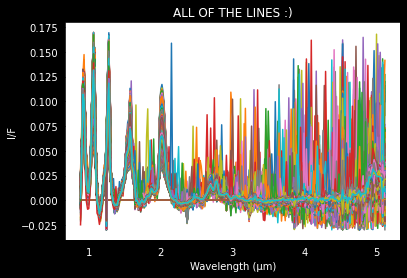

In [14]:
%matplotlib inline
mean_list = [] #List for shift to be plotted later
plt.figure(facecolor='black') # Must go before plt.plot() statement to work properly
for spectrum in total_array:
    k = 0
    for number in spectrum:
        if ((number >= .17) or (number <= -.03)): #Filtering out spectra with too high or too low I/F values
            k += 1
    if k == 0:
        plt.plot(vims_wave,spectrum)
        my_shift_value = shift_ret(spectrum)
        mean_list.append(my_shift_value)
plt.title('ALL OF THE LINES :)',color='white')
plt.xticks(color='white') #SETTING AXES TO WHITE - change these to black if you cannot read figure on repo or in standard notebook
plt.yticks(color='white')
plt.xlabel('Wavelength (µm)',color='white')
plt.ylabel('I/F',color='white')
plt.show()

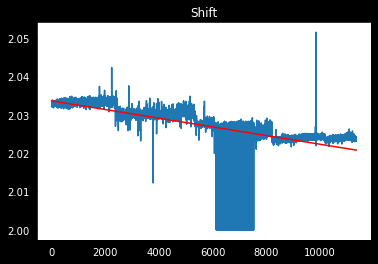

In [35]:
%matplotlib inline
plt.figure(facecolor='black')
length = len(mean_list)
x = np.linspace(0,length,length)
y = mean_list
p = np.polyfit(x,y,1)

fit = np.polyval(p,x)

plt.plot(x,y)
plt.plot(x,fit,color='red')
plt.xticks(color='white')
plt.yticks(color='white')
plt.title('Shift',color='white')
plt.show()

In [27]:
for entry in mean_list:
    if entry > 1:
        print(entry)

2.0331526196691803
2.032936345331397
2.033156000812413
2.0327693354604253
2.0327923747349317
2.0332211666833993
2.0329559953137237
2.033092779040857
2.032851796571551
2.032521709020812
2.032378038879354
2.0325087335183394
2.032519507584886
2.0327010759029807
2.0333530699005644
2.0319352346335084
2.033124181102197
2.033836026549232
2.0329235497592943
2.032212471846609
2.032617986189609
2.0330942228561346
2.0325872092656954
2.0323130060726142
2.0331261640967098
2.0324244841603805
2.032659245202481
2.0329952045315762
2.0328849640288054
2.0334143644447735
2.03311770912754
2.0328239745650962
2.0327943259851966
2.0323679910569146
2.0327314827520104
2.032913596435866
2.0325491239981512
2.033218599721209
2.0328761388256433
2.0326268928514604
2.0328905182625605
2.032478583869995
2.033104938326435
2.0321211237145085
2.0329512433613353
2.032499210703575
2.0328715494201703
2.0331091659271765
2.0326585371600556
2.033089568875158
2.032758506628681
2.0329058606345662
2.0325857266814498
2.032572504036

In [10]:
len(np.linspace(0,11350,11350))

11350